# Install and import dependencies

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.7/839.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 3.5

In [2]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

# Instantiate Model

In [2]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

# Encode and Calculate Sentiment

In [38]:
tokens = tokenizer.encode("Seated without a booking on a super busy Saturday night. Lovely, warm, and Theo right hostess also looked after our table and went out of her way to give detailed ingredients in every dish to avoid allergies for one of us. And the food was great! Guacamole made right at our table, everything prepared with our allergies in mind, and great dish recommendations. We'd been visiting Sydney for about a week from Melbourne, and this was by far our best dining experience. I'd definitely return here in the future.", return_tensors="pt")
tokens

tensor([[  101, 16749, 10390, 13208,   143, 11768, 10285, 10125,   143, 12278,
         79124, 24989, 12074,   119, 83944,   117, 36848,   117, 10110, 12986,
         12873, 17624, 22523, 10398, 56421, 10515, 14008, 17516, 10110, 13661,
         10871, 10108, 10483, 12140, 10114, 16118, 35131, 88703, 10104, 13667,
         80772, 10114, 32406, 17721, 84275, 10139, 10399, 10108, 10763,   119,
         10110, 10103, 15225, 10140, 11838,   106, 90368, 52262, 19079, 11050,
         12873, 10160, 14008, 17516,   117, 23225, 37462, 10171, 14008, 17721,
         84275, 10104, 15849,   117, 10110, 11838, 80772, 81603,   119, 11312,
           112,   146, 10662, 38219, 14809, 10139, 10935,   143, 14463, 10195,
         18127,   117, 10110, 10372, 10140, 10151, 12218, 14008, 11146, 90895,
         16277,   119,   151,   112,   146, 69923, 27393, 14142, 14048, 10104,
         10103, 14299,   119,   102]])

In [39]:
tokenizer.decode(tokens[0])

"[CLS] seated without a booking on a super busy saturday night. lovely, warm, and theo right hostess also looked after our table and went out of her way to give detailed ingredients in every dish to avoid allergies for one of us. and the food was great! guacamole made right at our table, everything prepared with our allergies in mind, and great dish recommendations. we'd been visiting sydney for about a week from melbourne, and this was by far our best dining experience. i'd definitely return here in the future. [SEP]"

In [40]:
result = model(tokens)
print(result)

SequenceClassifierOutput(loss=None, logits=tensor([[-0.7471, -0.3679, -0.5038,  0.3973,  1.0065]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [41]:
int(torch.argmax( result.logits ))+1

5

# Collecting Reviews

In [3]:
r = requests.get("https://www.yelp.com/biz/mejico-sydney-2#reviews")
soup = BeautifulSoup(r.text, "html.parser")
regex = re.compile('.*comment.*')
results = soup.find_all("p", {"class":regex})
reviews = [result.text for result in results]

In [4]:
reviews[0]

"Seated without a booking on a super busy Saturday night. Lovely, warm, and Theo right hostess also looked after our table and went out of her way to give detailed ingredients in every dish to avoid allergies for one of us. And the food was great! Guacamole made right at our table, everything prepared with our allergies in mind, and great dish recommendations. We'd been visiting Sydney for about a week from Melbourne, and this was by far our best dining experience. I'd definitely return here in the future."

# Load Reviews into DataFrame and Score

In [5]:
data = pd.DataFrame(np.array(reviews), columns=["reviews"])
data.head()

,reviews
0,Seated without a booking on a super busy Satur...
1,The food was decent not great.. We had the gu...
2,"Food was okay, guacamole was below average. Se..."
3,The food and service here was really good. It...
4,Visiting from Texas and decided to give this r...


In [6]:
def get_sentiment_score(review):
  tokens = tokenizer.encode(review, return_tensors="pt")
  result = model(tokens)
  return int(torch.argmax( result.logits ))+1

In [7]:
for index, row in data.iterrows():
  data.loc[index, "sentiment"] = get_sentiment_score(row["reviews"])

In [8]:
data['reviews']

0    Seated without a booking on a super busy Satur...
1    The food was decent not great..  We had the gu...
2    Food was okay, guacamole was below average. Se...
3    The food and service here was really good.  It...
4    Visiting from Texas and decided to give this r...
5    Don't come here expecting legit Mexican food b...
6    Out of all the restaurants that I tried in Syd...
7    Great atmosphere, attentive service, solid mar...
8    We came here on a Thursday night @ 5pm and by ...
9    The food is fresh and tasty.  The scallop cevi...
Name: reviews, dtype: object

In [45]:
data.head()

,reviews,sentiment
0,Seated without a booking on a super busy Satur...,5.0
1,The food was decent not great.. We had the gu...,2.0
2,"Food was okay, guacamole was below average. Se...",2.0
3,The food and service here was really good. It...,5.0
4,Visiting from Texas and decided to give this r...,5.0


from matplotlib import pyplot as plt
_df_0['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='sentiment', y='reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

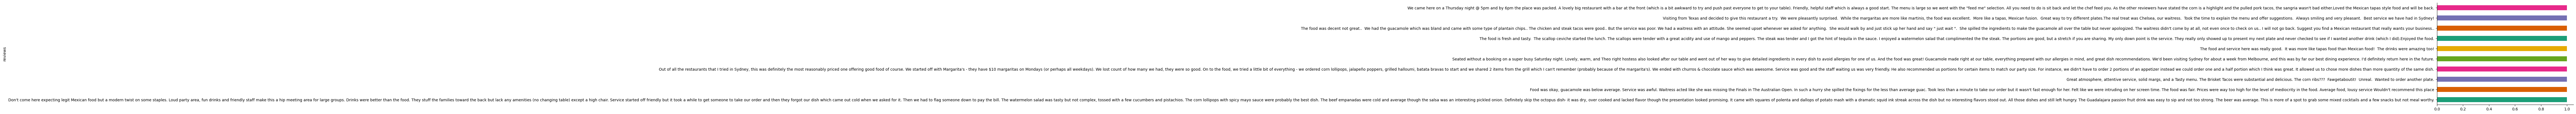

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)